#### Student Depression Random Forest
#### Name: Angel gabriel zuñiga peralta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Database

In [2]:
df = pd.read_csv('Student_depression_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [3]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df = df.drop('id', axis=1)
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
df.shape

(27901, 17)

In [7]:
df = df.dropna()
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [8]:
df['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1339
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1065
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               684
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [9]:
df['City'].value_counts()[df['City'].value_counts() < 400].sum()

np.int64(26)

In [10]:
### Removing cities with less than 400 students
common_cities = df['City'].value_counts()[df['City'].value_counts() >= 400].index
df = df[df['City'].isin(common_cities)]

In [11]:
df['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1339
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1065
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          684
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

<Axes: >

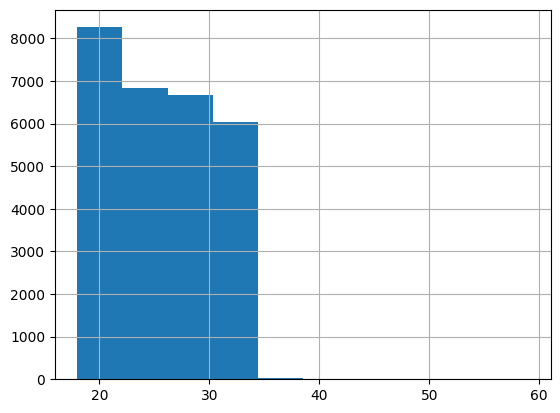

In [12]:
df.head()
df['Age'].hist()

<Axes: >

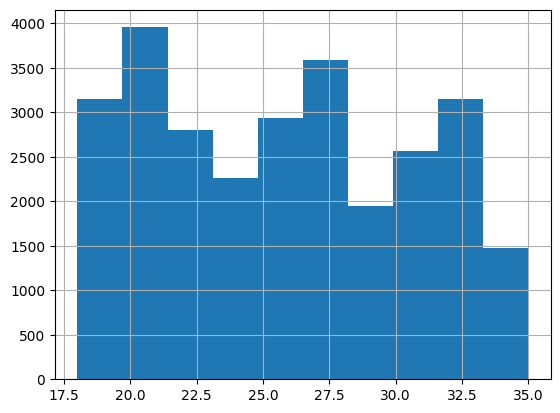

In [13]:
### Eliminate Outliers
df['Age'] = df['Age'] [df['Age'] <= 35]
df['Age'].hist()

In [14]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [15]:
### Profession data cleaning
df['Profession'].value_counts()
df = df.drop(['Profession'], axis=1)

In [16]:
df['Academic Pressure'].value_counts()

Academic Pressure
3.0    7453
5.0    6293
4.0    5151
1.0    4796
2.0    4170
0.0       9
Name: count, dtype: int64

In [17]:
df['Academic Pressure'] = df['Academic Pressure'] [df['Academic Pressure'] >=2 ]
df['Academic Pressure'].value_counts()

Academic Pressure
3.0    7453
5.0    6293
4.0    5151
2.0    4170
Name: count, dtype: int64

In [18]:
##### Work preasure data cleaning
df['Work Pressure'].value_counts()
df = df.drop(['Work Pressure'], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


<Axes: >

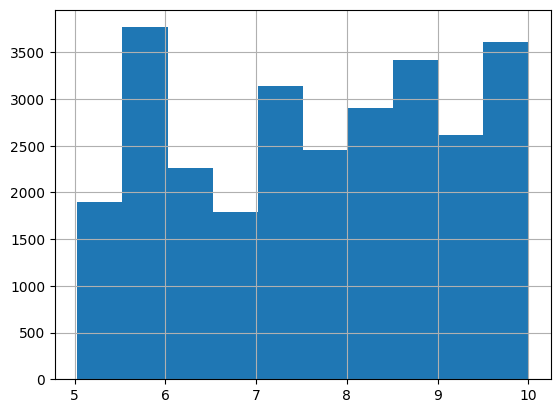

In [19]:
df['CGPA'] = df['CGPA'] [df['CGPA'] > 5]
df['CGPA'].hist()

In [20]:
df['Study Satisfaction'] = df['Study Satisfaction'] [df['Study Satisfaction'] >= 1 ]

In [21]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [22]:
df['Job Satisfaction'].value_counts()

Job Satisfaction
0.0    27864
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64

In [23]:
df =df.drop(['Job Satisfaction'], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [24]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8302
7-8 hours            7336
5-6 hours            6175
More than 8 hours    6041
Others                 18
Name: count, dtype: int64

In [25]:
#### Delete Others category
df = df.loc[df['Sleep Duration'] != 'Others']
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8302
7-8 hours            7336
5-6 hours            6175
More than 8 hours    6041
Name: count, dtype: int64

In [26]:
#### Delete Other category on Dietary Habits
df = df.loc[df['Dietary Habits'] != 'Others']
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10295
Moderate      9908
Healthy       7639
Name: count, dtype: int64

In [27]:
df['Degree'].value_counts()

Degree
Class 12    6074
B.Ed        1861
B.Com       1503
B.Arch      1476
BCA         1429
MSc         1187
B.Tech      1151
MCA         1041
M.Tech      1019
BHM          924
BSc          886
M.Ed         817
B.Pharm      809
M.Com        734
BBA          696
MBBS         694
LLB          669
BE           609
BA           595
M.Pharm      581
MD           571
MBA          560
MA           544
PhD          520
LLM          481
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [28]:
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    17619
No     10223
Name: count, dtype: int64

In [29]:
df['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    4227
12.0    3164
11.0    2888
8.0     2505
6.0     2241
9.0     2024
7.0     1995
0.0     1696
4.0     1608
2.0     1584
3.0     1467
5.0     1296
1.0     1147
Name: count, dtype: int64

<Axes: >

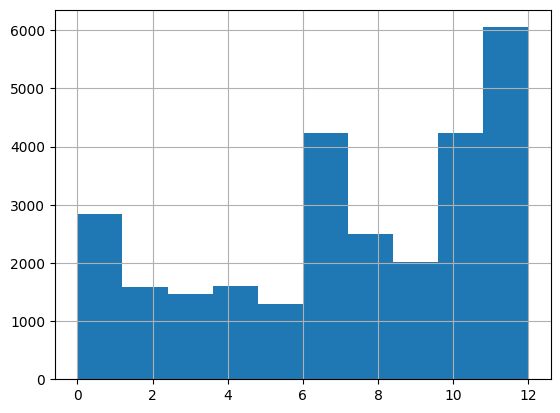

In [30]:
df['Work/Study Hours'].hist()

In [31]:
df['Financial Stress'].value_counts()

Financial Stress
5.0    6701
4.0    5769
3.0    5217
1.0    5106
2.0    5049
Name: count, dtype: int64

In [32]:
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     14362
Yes    13480
Name: count, dtype: int64

In [33]:
df['Depression'].value_counts()

Depression
1    16303
0    11539
Name: count, dtype: int64

In [34]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


#### Data Transformation

In [35]:
df['Sleep Duration'].value_counts()
df.loc[df['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 0
df.loc[df['Sleep Duration'] == '5-6 hours','Sleep Duration'] = 1
df.loc[df['Sleep Duration'] == '7-8 hours','Sleep Duration'] = 2
df.loc[df['Sleep Duration'] == 'More than 8 hours','Sleep Duration'] = 3
df['Sleep Duration'].value_counts()

Sleep Duration
0    8297
2    7333
1    6172
3    6040
Name: count, dtype: int64

In [36]:
## Changing diatary habits
df['Dietary Habits'].value_counts()
df.loc[df['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 0
df.loc[df['Dietary Habits'] == 'Unhealthy','Dietary Habits'] = 1
df.loc[df['Dietary Habits'] == 'Moderate','Dietary Habits'] = 2
df['Dietary Habits'].value_counts()

Dietary Habits
1    10295
2     9908
0     7639
Name: count, dtype: int64

In [37]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,1,0,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,1,2,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0,0,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,2,2,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,1,2,M.Tech,Yes,1.0,1.0,No,0


In [38]:
# Creating new degree column with
df.loc[df['Degree'].str.contains(r'Bsc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|B|LLB',regex = True), 'new_degree' ]= 'Graduated'
df.loc[df['Degree'].str.contains(r'Msc|LLM|M',regex = True), 'new_degree' ]= 'Post Graduated'
df.loc[df['Degree'] == 'Class 12','new_degree' ]= 'High school'
df = df.loc[df['Degree'] != 'Others']
df['new_degree'].value_counts()

new_degree
Graduated         11684
Post Graduated     9529
High school        6074
Name: count, dtype: int64

In [39]:
df.loc[df['new_degree'] == 'Graduated','new_degree'] = 0
df.loc[df['new_degree'] == 'Post Graduated','new_degree'] = 1
df.loc[df['new_degree'] == 'High school','new_degree'] = 2
df['new_degree'].value_counts()

new_degree
0    11684
1     9529
2     6074
Name: count, dtype: int64

In [40]:
df['Family History of Mental Illness'].head()
df.loc[df['Family History of Mental Illness'] == 'Yes','Family History of Mental Illness'] = 1
df.loc[df['Family History of Mental Illness'] == 'No','Family History of Mental Illness'] = 0
df['Family History of Mental Illness'].value_counts()


Family History of Mental Illness
0    14343
1    13464
Name: count, dtype: int64

In [41]:
df = df.drop(['Degree'], axis=1)

In [42]:
df['Gender'].head()
df.loc[df['Gender'] == 'Female','Gender'] = 1
df.loc[df['Gender'] == 'Male','Gender'] = 0
df['Gender'].value_counts()

Gender
0    15496
1    12311
Name: count, dtype: int64

In [43]:
df['Have you ever had suicidal thoughts ?'].head()
df.loc[df['Have you ever had suicidal thoughts ?'] == 'Yes','Have you ever had suicidal thoughts ?'] = 1
df.loc[df['Have you ever had suicidal thoughts ?'] == 'No','Have you ever had suicidal thoughts ?'] = 0
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
1    17599
0    10208
Name: count, dtype: int64

In [44]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,new_degree
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,1,0,1,3.0,1.0,0,1,0
1,1,24.0,Bangalore,2.0,5.90,5.0,1,2,0,3.0,2.0,1,0,0
2,0,31.0,Srinagar,3.0,7.03,5.0,0,0,0,9.0,1.0,1,0,0
3,1,28.0,Varanasi,3.0,5.59,2.0,2,2,1,4.0,5.0,1,1,0
4,1,25.0,Jaipur,4.0,8.13,3.0,1,2,1,1.0,1.0,0,0,1


In [45]:
#### One Hot Encoding
df = pd.get_dummies(df, columns=['City'], drop_first=True)
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,0,33.0,5.0,8.97,2.0,1,0,1,3.0,1.0,...,False,False,False,False,False,False,False,False,False,True
1,1,24.0,2.0,5.90,5.0,1,2,0,3.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,0,31.0,3.0,7.03,5.0,0,0,0,9.0,1.0,...,False,False,False,True,False,False,False,False,False,False
3,1,28.0,3.0,5.59,2.0,2,2,1,4.0,5.0,...,False,False,False,False,False,False,False,True,False,False
4,1,25.0,4.0,8.13,3.0,1,2,1,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [46]:
df.replace({False:0,True:1}, inplace=True)
df.head()

C:\Users\Dilan\AppData\Local\Temp\ipykernel_14472\930699413.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False:0,True:1}, inplace=True)


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,0,33.0,5.0,8.97,2.0,1,0,1,3.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,1,24.0,2.0,5.90,5.0,1,2,0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,0,31.0,3.0,7.03,5.0,0,0,0,9.0,1.0,...,0,0,0,1,0,0,0,0,0,0
3,1,28.0,3.0,5.59,2.0,2,2,1,4.0,5.0,...,0,0,0,0,0,0,0,1,0,0
4,1,25.0,4.0,8.13,3.0,1,2,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


### Decision Tree Implementation

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

### Split Dataset

In [48]:
X = df.drop('Depression', axis=1)
y = df['Depression']

In [49]:
#### Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
#### Train the decision tree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [51]:
#### Evaluate the model with parameters
y_pred = tree.predict(X_train)
accuracy_score(y_train, y_pred)


0.821465269214961

<Axes: >

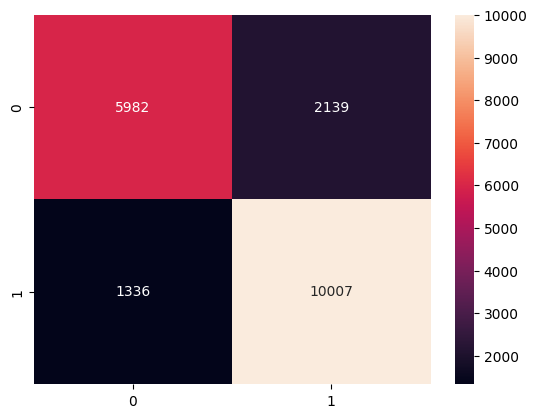

In [52]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt ='d')

In [53]:
#### Evaluate model with test data
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.8271604938271605

<Axes: >

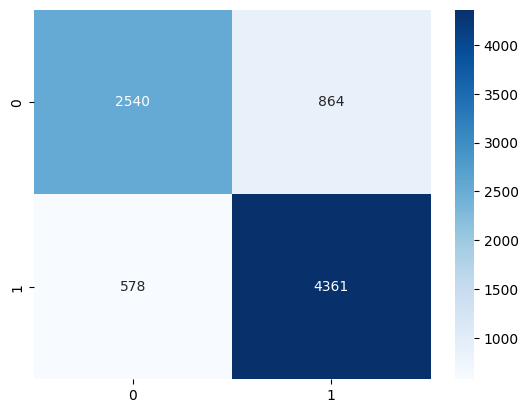

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

#### Hypermararmeter tunning

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                          param_grid,
                          cv=5,
                          scoring='accuracy')

grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_train)

In [56]:
y_pred = best_tree.predict(X_train)

In [57]:
best_tree

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
accuracy_score(y_train, y_pred)

0.8373921085080148

<Axes: >

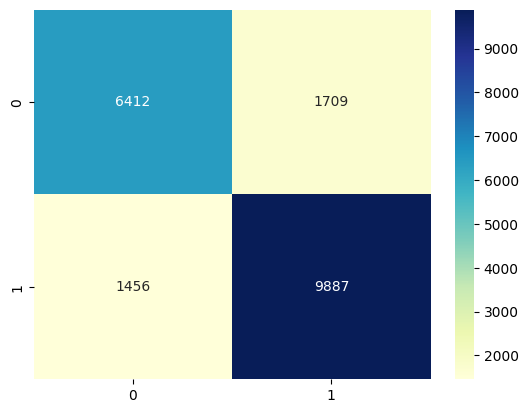

In [59]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='YlGnBu')

In [60]:
y_pred = best_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.8230852211434736

<Axes: >

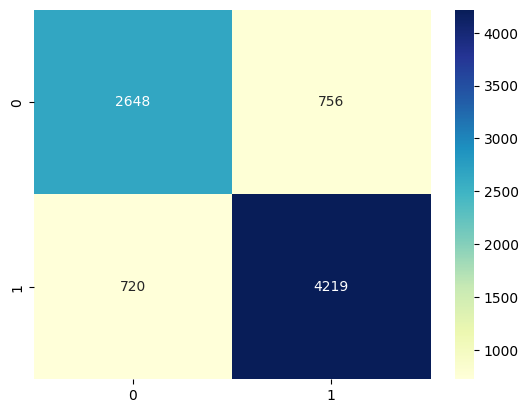

In [61]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')

##### Feature Importance

In [62]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
7,Have you ever had suicidal thoughts ?,0.562942
2,Academic Pressure,0.242647
9,Financial Stress,0.105481
1,Age,0.047870
8,Work/Study Hours,0.017949
6,Dietary Habits,0.015083
4,Study Satisfaction,0.003687
11,new_degree,0.001345
16,City_Delhi,0.001280
36,City_Thane,0.000810


In [63]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,0,33.0,5.0,8.97,2.0,1,0,1,3.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,1,24.0,2.0,5.90,5.0,1,2,0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,0,31.0,3.0,7.03,5.0,0,0,0,9.0,1.0,...,0,0,0,1,0,0,0,0,0,0
3,1,28.0,3.0,5.59,2.0,2,2,1,4.0,5.0,...,0,0,0,0,0,0,0,1,0,0
4,1,25.0,4.0,8.13,3.0,1,2,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


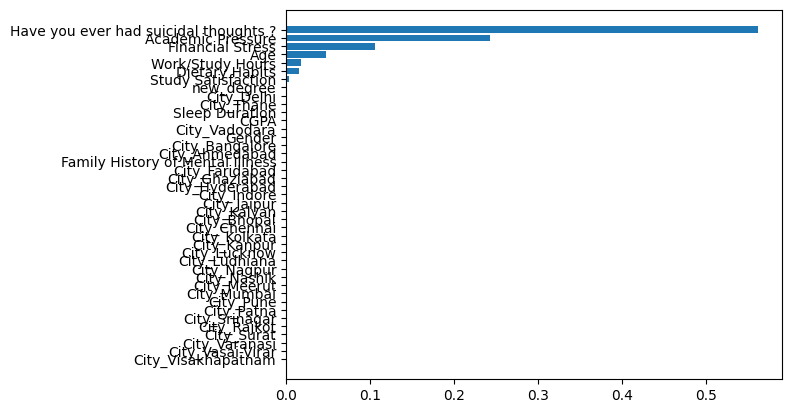

In [64]:
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()

#### Random Forest Implementation

In [65]:
#Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#### Split Data into train and test

In [66]:
X= df.drop(columns='Depression', axis=1)
y = df['Depression']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#### Create Random Forest Model

In [69]:
model = RandomForestClassifier(n_estimators = 200,max_depth=6,random_state=42)

#### Train Random Forest Model

In [71]:
model.fit(X_train,y_train)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Evaluate the model

In [72]:
y_pred = model.predict(X_train)
accuracy_score(y_train,y_pred)

0.842632552404439

In [73]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8367493707299533

<Axes: >

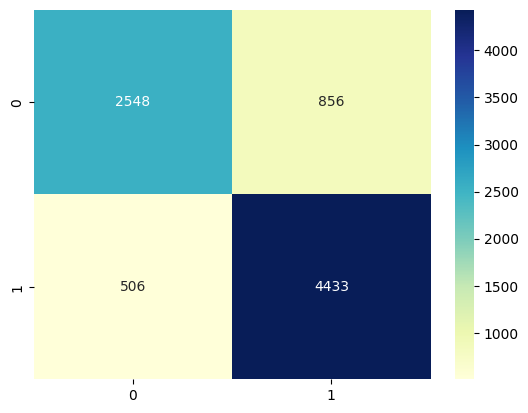

In [74]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='YlGnBu', fmt='d')

#### Hyperparameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200,300,400],
    'max_depth': [4,5,8,10],
    'max_features':['sqrt','Log2'],
    'bootstrap':[True,False]
}

In [76]:
#### Searching the optimal Hyperparameters
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

c:\Users\Dilan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dilan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dilan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [4, 5, ...], 'max_features': ['sqrt', 'Log2'], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,400


In [77]:
best_model = grid_search.best_estimator_
best_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [78]:
y_pred = best_model.predict(X_train)
accuracy_score(y_pred,y_train)

0.8815762433210029

In [79]:
y_pred = best_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8398657557233609

<Axes: >

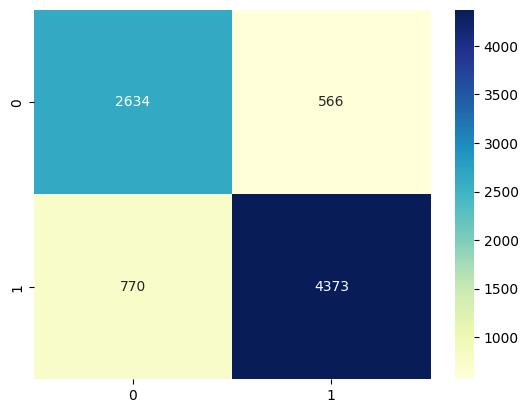

In [80]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot =True, cmap='YlGnBu',fmt='d')